In [1]:
#libraries
import numpy as np
import pandas as pd

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib


In [3]:
# read the data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission_iA3afxn.csv')

In [4]:
train.shape, test.shape, sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [340]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [5]:
# to check the missing values
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
train.head(2)

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   Male   44                1         28.0                   0   
1   2   Male   76                1          3.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   

   Response  
0         1  
1         0

In [7]:
# to see the column names and its datatype
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
# idenitify cols
tgt_col = ['Response']
ign_cols = ['id']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [9]:
print(tgt_col, ign_cols, cat_cols, num_cols,sep='\n')

['Response']
['id']
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')
Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [10]:
train[cat_cols].head(2)

Gender Vehicle_Age Vehicle_Damage
0   Male   > 2 Years            Yes
1   Male    1-2 Year             No

In [11]:
train[num_cols].head(2)

id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1         28.0                   0         40454.0   
1   2   76                1          3.0                   0         33536.0   

   Policy_Sales_Channel  Vintage  Response  
0                  26.0      217         1  
1                  26.0      183         0

In [12]:
# to see numerical columns after removing the target columns and not required columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
train[num_cols].head(2)

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   

   Policy_Sales_Channel  Vintage  
0                  26.0      217  
1                  26.0      183

In [13]:
train.isna().sum()/train.shape[0]*100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [14]:
# to check duplicates
train.duplicated().sum()

0

In [15]:
tgt_col = ['Response']

In [16]:
# check target data
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [17]:

train.Response.value_counts(normalize=True)*100

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

<Axes: xlabel='Response'>

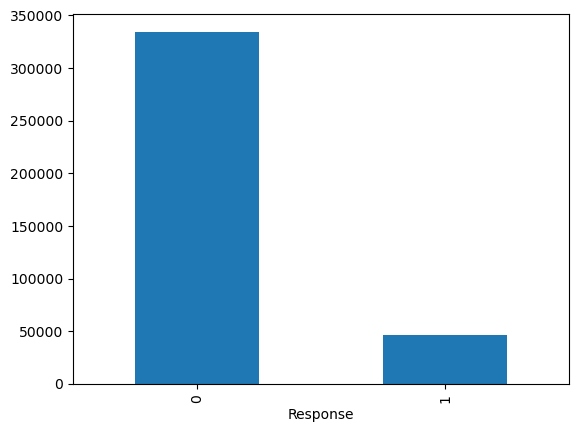

In [18]:

train.Response.value_counts().plot(kind='bar')

In [19]:
train.drop(columns=ign_cols).describe().T

count          mean           std     min      25%  \
Age                   381109.0     38.822584     15.511611    20.0     25.0   
Driving_License       381109.0      0.997869      0.046110     0.0      1.0   
Region_Code           381109.0     26.388807     13.229888     0.0     15.0   
Previously_Insured    381109.0      0.458210      0.498251     0.0      0.0   
Annual_Premium        381109.0  30564.389581  17213.155057  2630.0  24405.0   
Policy_Sales_Channel  381109.0    112.034295     54.203995     1.0     29.0   
Vintage               381109.0    154.347397     83.671304    10.0     82.0   
Response              381109.0      0.122563      0.327936     0.0      0.0   

                          50%      75%       max  
Age                      36.0     49.0      85.0  
Driving_License           1.0      1.0       1.0  
Region_Code              28.0     35.0      52.0  
Previously_Insured        0.0      1.0       1.0  
Annual_Premium        31669.0  39400.0  540165.0  
Policy_Sales_Channel    133.0    152.0     163.0  
Vintage                 154.0    227.0     299.0  
Response                  0.0      0.0       1.0

In [20]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [21]:
# check unique values

for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

Gender 2 => ['Male' 'Female']
Age 66 => [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 => [1 0]
Region_Code 53 => [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 => [0 1]
Vehicle_Age 3 => ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 => ['Yes' 'No']
Annual_Premium 48838 => [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 => [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  

In [22]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Annual_Premium', ylabel='Density'>

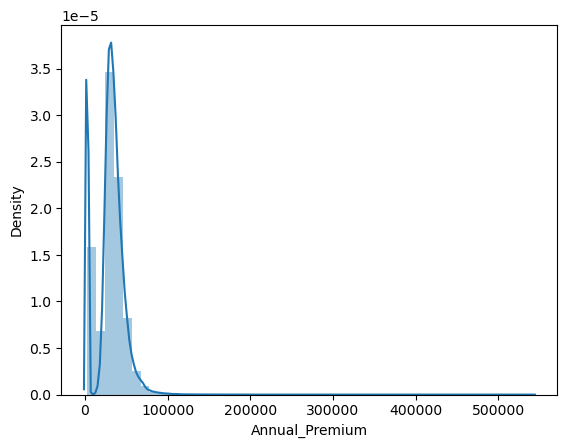

In [23]:
import seaborn as sns
sns.distplot(train.Annual_Premium)

<Axes: xlabel='Vintage', ylabel='Density'>

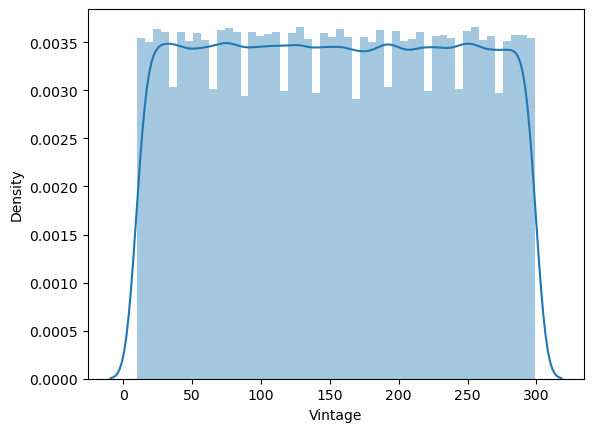

In [24]:
sns.distplot(train.Vintage)    

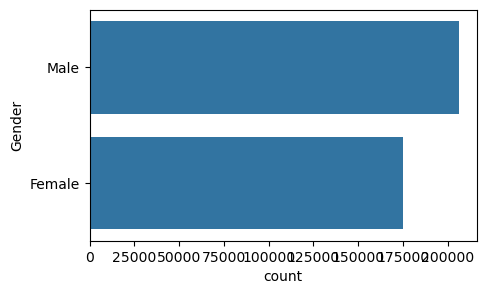

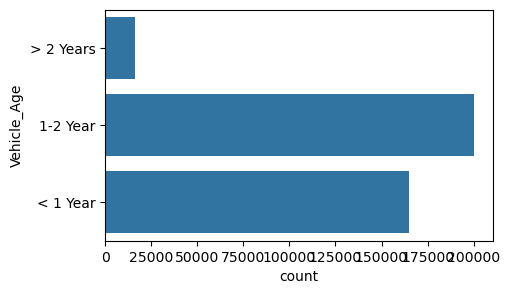

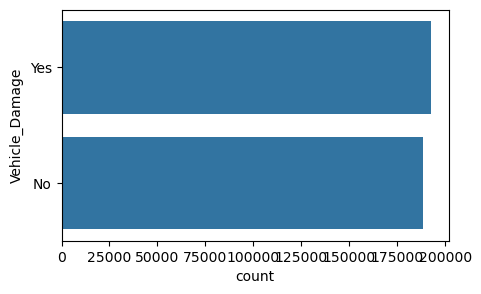

In [25]:
import matplotlib.pyplot as plt
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

In [26]:
#Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [27]:
# to see numerical columns after removing the target columns and not required columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
train[num_cols].head(2)

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   

   Policy_Sales_Channel  Vintage  
0                  26.0      217  
1                  26.0      183

In [28]:
cat_cols = train.select_dtypes(include='object').columns

In [29]:
# create pipeline to do preprocessing of category columns
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
        ('ohe',OneHotEncoder(handle_unknown='ignore')) # category encoding
    ]
)

In [30]:
# create piplene to perform preprocessing of numerical columns
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num',SimpleImputer(strategy='median')), # impute missing values
        ('scale', StandardScaler())  # standard scaler
    ]
)

In [31]:
# create map b/w the pipeline and the columns 
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode', cat_pipe_encode, cat_cols),  # categorical columns
        ('num_encode', num_pipe_encode, num_cols)   # numerical columns
    ]
)

In [32]:
# create object for the LogisticRegeression algo
logmodel = LogisticRegression()

In [33]:
# merging the preprocessing and modelling in a pipeline
log_model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', logmodel)  #modelling
    ]
)

In [34]:
# split the train dataset to train and validation
X = train.drop(columns = ign_cols + tgt_col)
X.head(2)

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0   Male   44                1         28.0                   0   > 2 Years   
1   Male   76                1          3.0                   0    1-2 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183

In [35]:
y = train[tgt_col]
y.head(2)

Response
0         1
1         0

In [36]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [37]:

train.shape, int(train.shape[0]*.9), int(train.shape[0]*.1)

((381109, 12), 342998, 38110)

In [38]:
# fit the model
log_model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [39]:
# perform prediction with train itself
log_model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC ROC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC ROC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)    

Train AUC ROC
0.5000635495727982
Valid AUC ROC
0.49998499759961595
Train cnf_matrix
[[301059     12]
 [ 41920      7]]
Valid cnf_matrix
[[33327     1]
 [ 4783     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.37      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.62      0.50      0.47    342998
weighted avg       0.82      0.88      0.82    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111



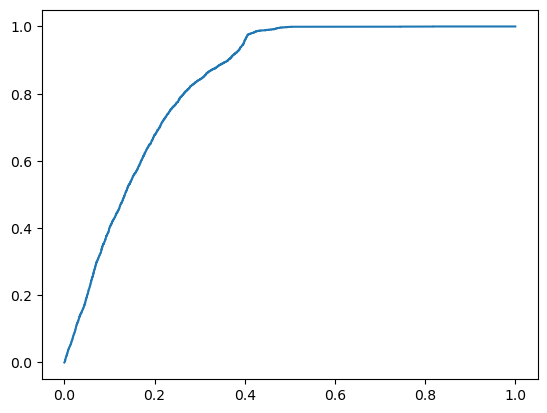

In [41]:
model_train_val_eval(train_X, val_X, train_y, val_y, log_model_pipeline)

In [42]:
#Using GridSearch to hyper tune single model
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [43]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=log_model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [44]:
# fit the grid model

#grid.fit(train_X, train_y)

In [45]:
# get the best parameter

#grid.best_params_

In [46]:
# show the grid results

#res_df = pd.DataFrame(grid.cv_results_,)
#pd.set_option('display.max_colwidth',100)
#res_df[['params','mean_test_score','rank_test_score']]

In [47]:
# read the submission file
#predict with the last model
#and upload into the hack website

#sub = pd.read_csv('sample_submission_iA3afxn.csv')
#sub.head(3)

In [48]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [49]:
# updating the existing target values with predicted values
sub['Response'] = log_model_pipeline.predict(test)

In [50]:
sub.to_csv('sub_1.csv',index=False)

In [51]:
sub

id  Response
0       381110         0
1       381111         0
2       381112         0
3       381113         0
4       381114         0
...        ...       ...
127032  508142         0
127033  508143         0
127034  508144         0
127035  508145         0
127036  508146         0

[127037 rows x 2 columns]

In [52]:
 test.head(3)

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199

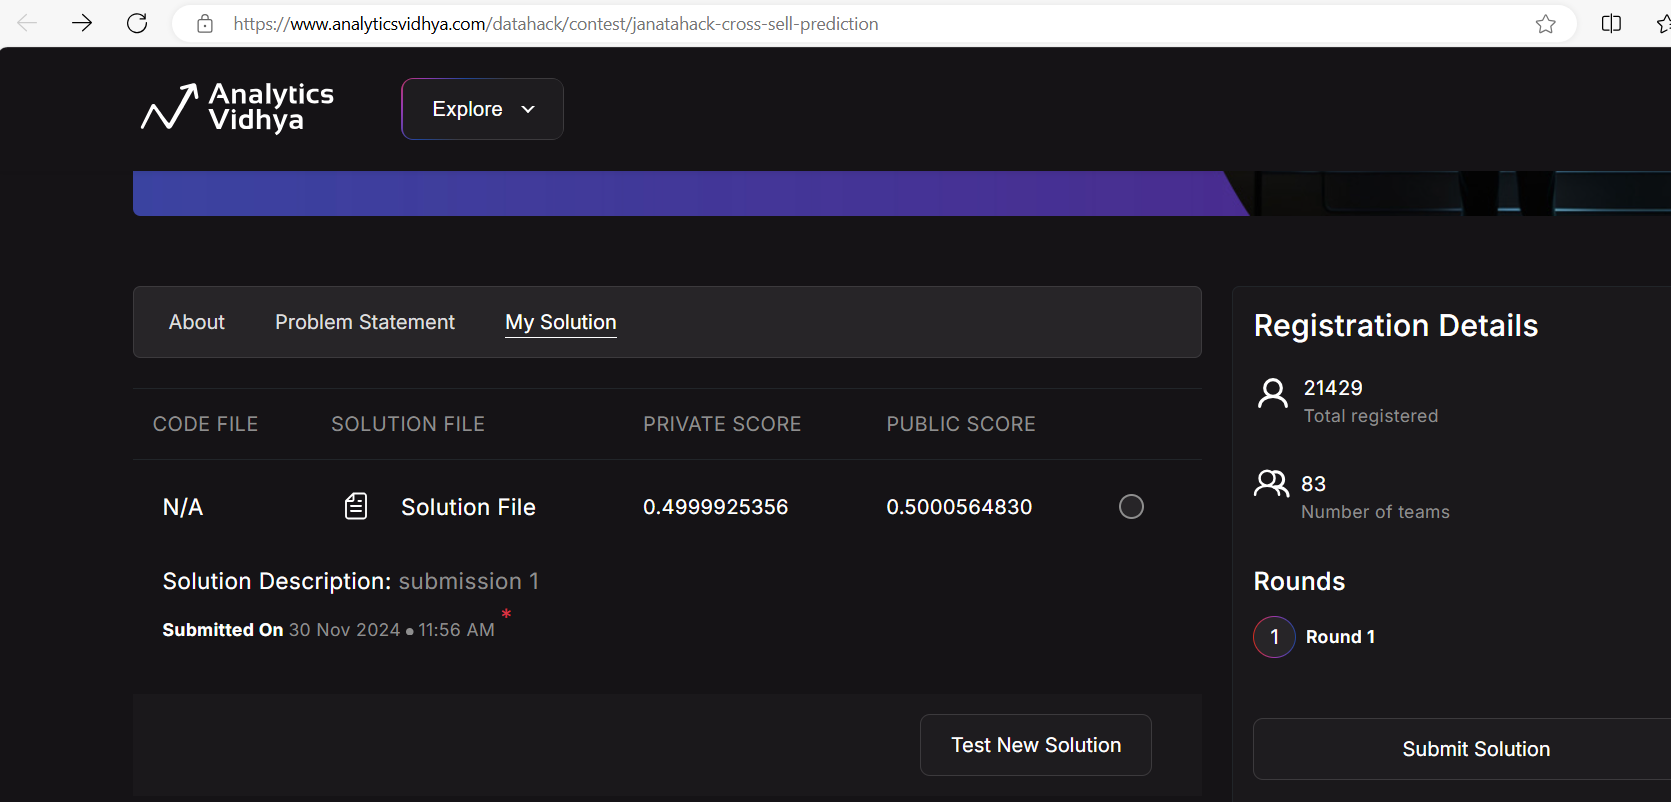

In [53]:
#perform oversampling to balance the dataset

from imblearn.over_sampling import RandomOverSampler
over_sampling = RandomOverSampler()
import imblearn
imblearn.__version__

'0.11.0'

In [54]:
import sklearn
sklearn.__version__

'1.2.2'

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]


In [57]:
grid_2 = GridSearchCV(estimator=log_model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [58]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [59]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [60]:
#grid_2.fit(train_X_os, train_y_os)

In [61]:
#grid_2

In [62]:

#grid_2.best_params_

In [63]:
#grid_2.best_estimator_

In [64]:
#grid_2.cv_results_

In [65]:
#second_model = grid_2.best_estimator_

In [66]:
#model_train_val_eval(train_X,val_X,train_y,val_y,second_model)

In [67]:

#res_df_2 = pd.DataFrame(grid_2.cv_results_,)
#pd.set_option('display.max_colwidth',100)
#res_df_2[['params','mean_test_score','rank_test_score']]

In [68]:
# updating the existing target values with predicted values
#sub['Response'] = second_model.predict(test)
#sub.to_csv('sub_2.csv',index=False)

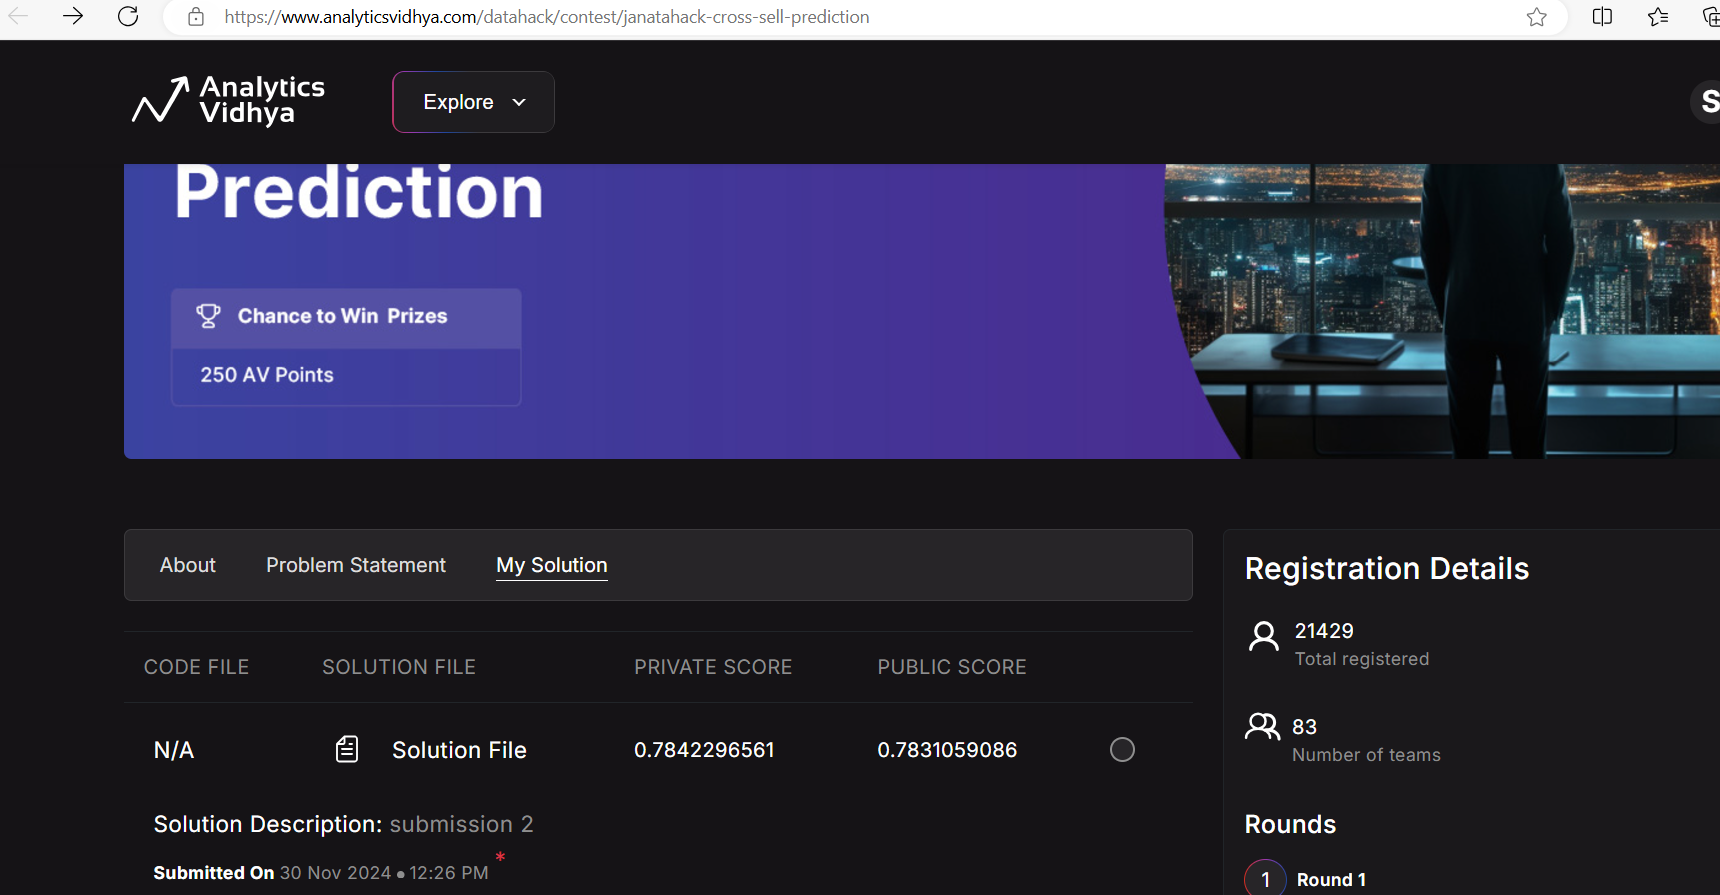

In [69]:
#Using GridSearch to hyper tune multi model along with ensembling

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [70]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]

In [71]:
params_ran = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()], ], 
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],        
    }

]

In [72]:
grid_3_ran = GridSearchCV(estimator=log_model_pipeline, param_grid=params_ran, cv=2, scoring='roc_auc',verbose=3)

In [73]:
#grid_3_ran.fit(train_X_os, train_y_os)

In [74]:
#grid_3 = GridSearchCV(estimator=log_model_pipeline, param_grid=params_3, cv=2, scoring='roc_auc',verbose=3)

In [75]:
#grid_3.fit(train_X_os, train_y_os)

In [76]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [77]:
from imblearn.under_sampling import RandomUnderSampler
under_sampling = RandomUnderSampler()
train_X_us, train_y_us = under_sampling.fit_resample(train_X,train_y)

In [78]:
#grid_3.fit(train_X_us, train_y_us)

In [79]:
train_y_us.value_counts()

Response
0           41927
1           41927
Name: count, dtype: int64

In [80]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [81]:
#grid_3.best_params_

In [82]:
#grid_3.cv_results_

In [83]:
#fourth_model = grid_3_ran.best_estimator_

In [84]:
#model_train_val_eval(train_X,val_X,train_y,val_y,fourth_model)

In [85]:
#sub['Response'] = fourth_model.predict(test)
#sub.to_csv('log_ran.csv',index=False)

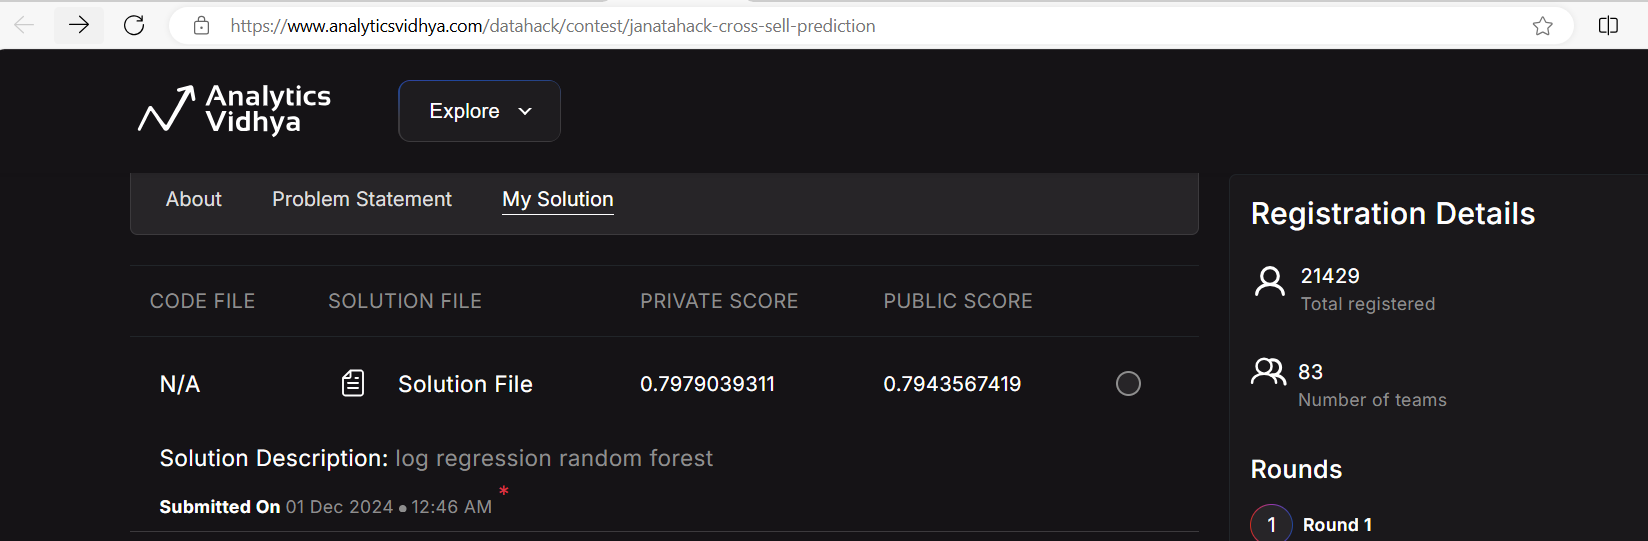

In [86]:
#third_model = grid_3.best_estimator_

In [87]:
#model_train_val_eval(train_X,val_X,train_y,val_y,third_model)

In [88]:
#res_df_3 = pd.DataFrame(grid_3.cv_results_,)
#pd.set_option('display.max_colwidth',100)
#res_df_3[['params','mean_test_score','rank_test_score']]

In [89]:
#sub['Response'] = third_model.predict(test)
#sub.to_csv('sub_3.csv',index=False)

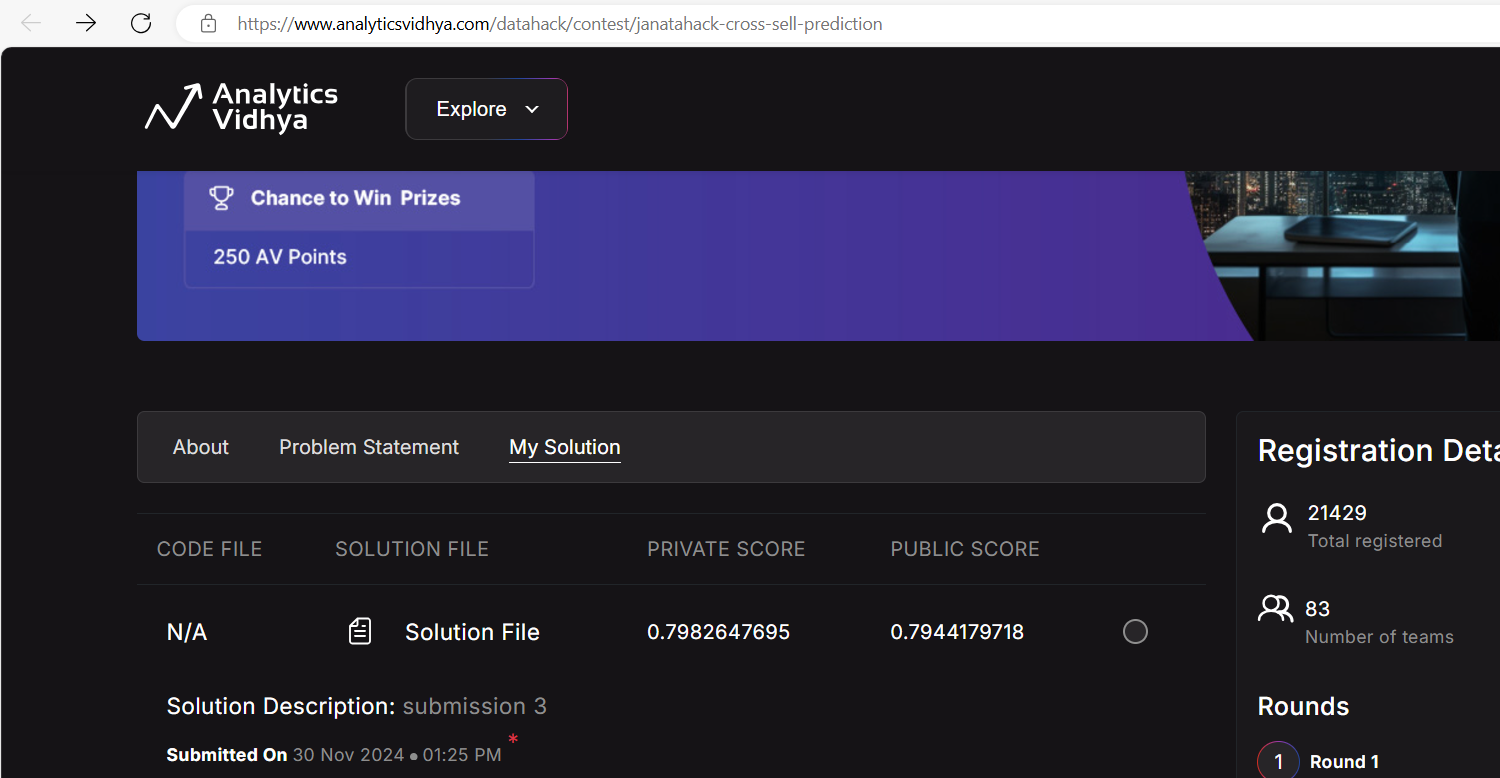

In [90]:
model_pipeline_2 = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('classifier', RandomForestClassifier())
    ]
)

In [91]:
param_grid = {
    'classifier__n_estimators' : [50, 100, 150, 200, 250, 300],
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'classifier__class_weight' : [None, "balanced", "balanced_subsample"]
}

In [92]:
#grid_4 = GridSearchCV(estimator=model_pipeline_2, param_grid=param_grid, cv=2, scoring='roc_auc',verbose=3)

In [93]:
#grid_4.fit(train_X_us, train_y_us)

In [94]:
#grid_4.best_params_

In [95]:
#grid_4.best_estimator_

In [96]:
#model_4 = grid_4.best_estimator_

In [97]:
#model_train_val_eval(train_X,val_X,train_y,val_y,model_4)

In [98]:
#res_df_4 = pd.DataFrame(grid_4.cv_results_,)
#pd.set_option('display.max_colwidth',500)
#res_df_4[['params','mean_test_score','rank_test_score']]

In [99]:
# updating the existing target values with predicted values
#sub['Response'] = model_4.predict(test)
#sub.to_csv('sub_4.csv',index=False)

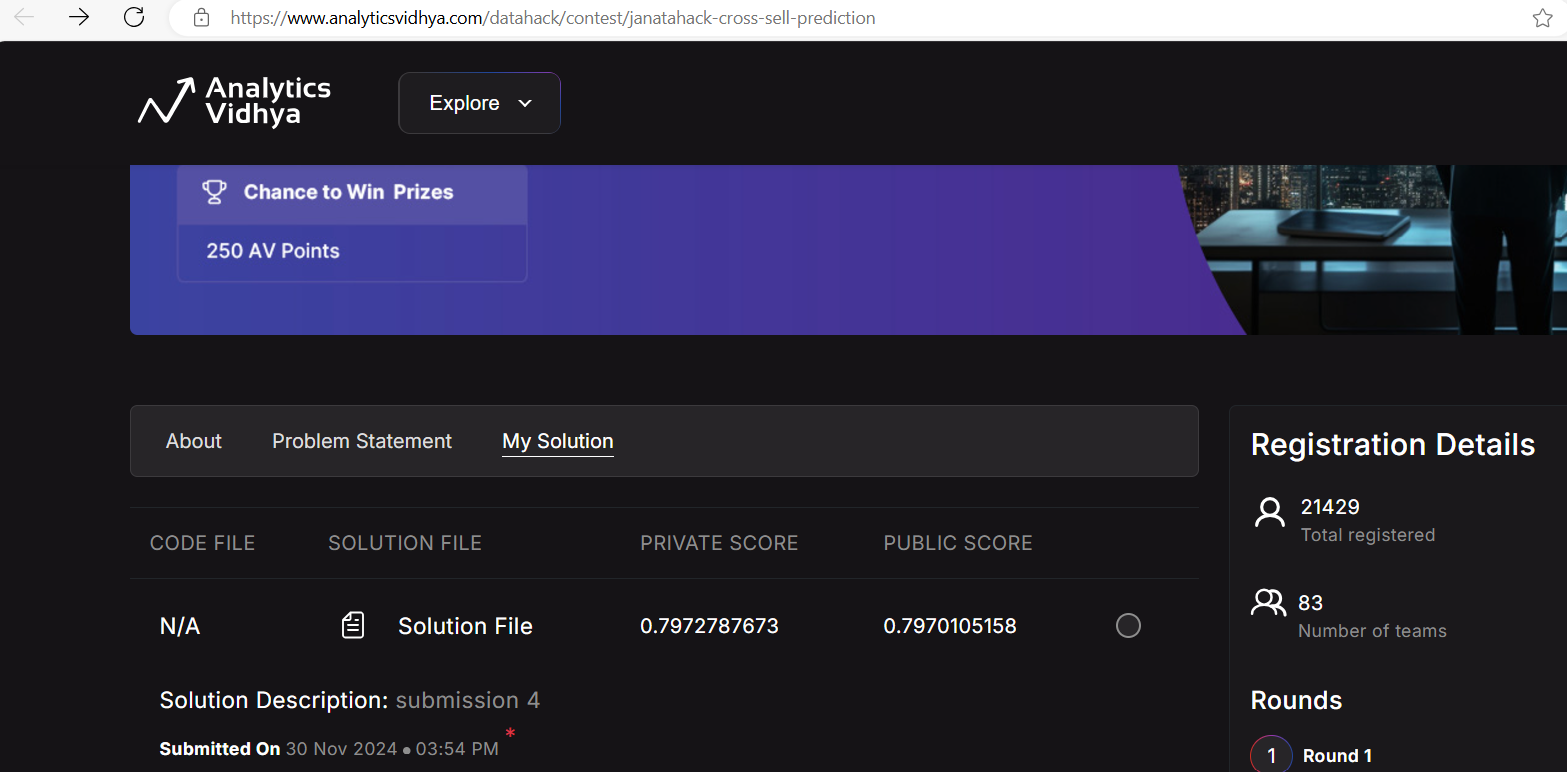

In [100]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1)

In [101]:
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

In [102]:
model_pipeline_adaboost = Pipeline(
    steps=[
        ('preprocess', preprocess),  # Same preprocessing step
        ('classifier', AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=2),  # Weak learner
            n_estimators=100,  # Number of weak learners
            learning_rate=0.1,  # Contribution of each learner
            random_state=42    # Ensures reproducibility
            ))
    ]
)

In [103]:
model_pipeline_adaboost

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

In [104]:
#model_pipeline_adaboost.fit(train_X, train_y)

In [105]:
#y_pred_adaboost = model_pipeline_adaboost.predict(val_X)

In [106]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
#print("ROC Score:", roc_auc_score(val_y, y_pred_adaboost))
#print("Accuracy:", accuracy_score(val_y, y_pred_adaboost))
#print("\nClassification Report:\n", classification_report(val_y, y_pred_adaboost))

In [107]:
param_grid_ada_boost = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__base_estimator__max_depth': [1, 2, 3]
}

In [108]:
#grid_5 = GridSearchCV(estimator=model_pipeline_adaboost, param_grid=param_grid_ada_boost, cv=2, scoring='roc_auc',verbose=3)

In [109]:
#grid_5.fit(train_X_os, train_y_os)

In [110]:
#y_pred_adaboost = model_pipeline_adaboost.predict(val_X)

In [111]:
#adaboost_model = grid_5.best_estimator_

In [112]:
#model_train_val_eval(train_X,val_X,train_y,val_y,adaboost_model)

In [113]:
#sub['Response'] = adaboost_model.predict(test)
#sub.to_csv('adaboost.csv',index=False)

In [114]:
#grid_5.fit(train_X_us, train_y_us)

In [115]:
#adaboost_model = grid_5.best_estimator_

In [116]:
#model_train_val_eval(train_X,val_X,train_y,val_y,adaboost_model)

In [117]:
#sub['Response'] = adaboost_model.predict(test)
#sub.to_csv('adaboost_us.csv',index=False)

In [118]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
randomized_search = RandomizedSearchCV(estimator=model_pipeline_adaboost, cv = 2, param_distributions=param_grid_ada_boost,scoring = 'roc_auc', random_state= 32 ,verbose=3)

In [120]:
#randomized_search.fit(train_X, train_y)

In [121]:
#randomized_search.best_estimator_

In [122]:
#randomized_search.best_params_

In [123]:
#adaboost_model_rnd_srch = randomized_search.best_estimator_
#model_train_val_eval(train_X,val_X,train_y,val_y,adaboost_model_rnd_srch)

#randomized_search.fit(train_X, train_y)
# ROC is low for trainX and train y without sampling

In [124]:
#sub['Response'] = adaboost_model_rnd_srch.predict(test)
#sub.to_csv('adaboost_rnd_src.csv',index=False)

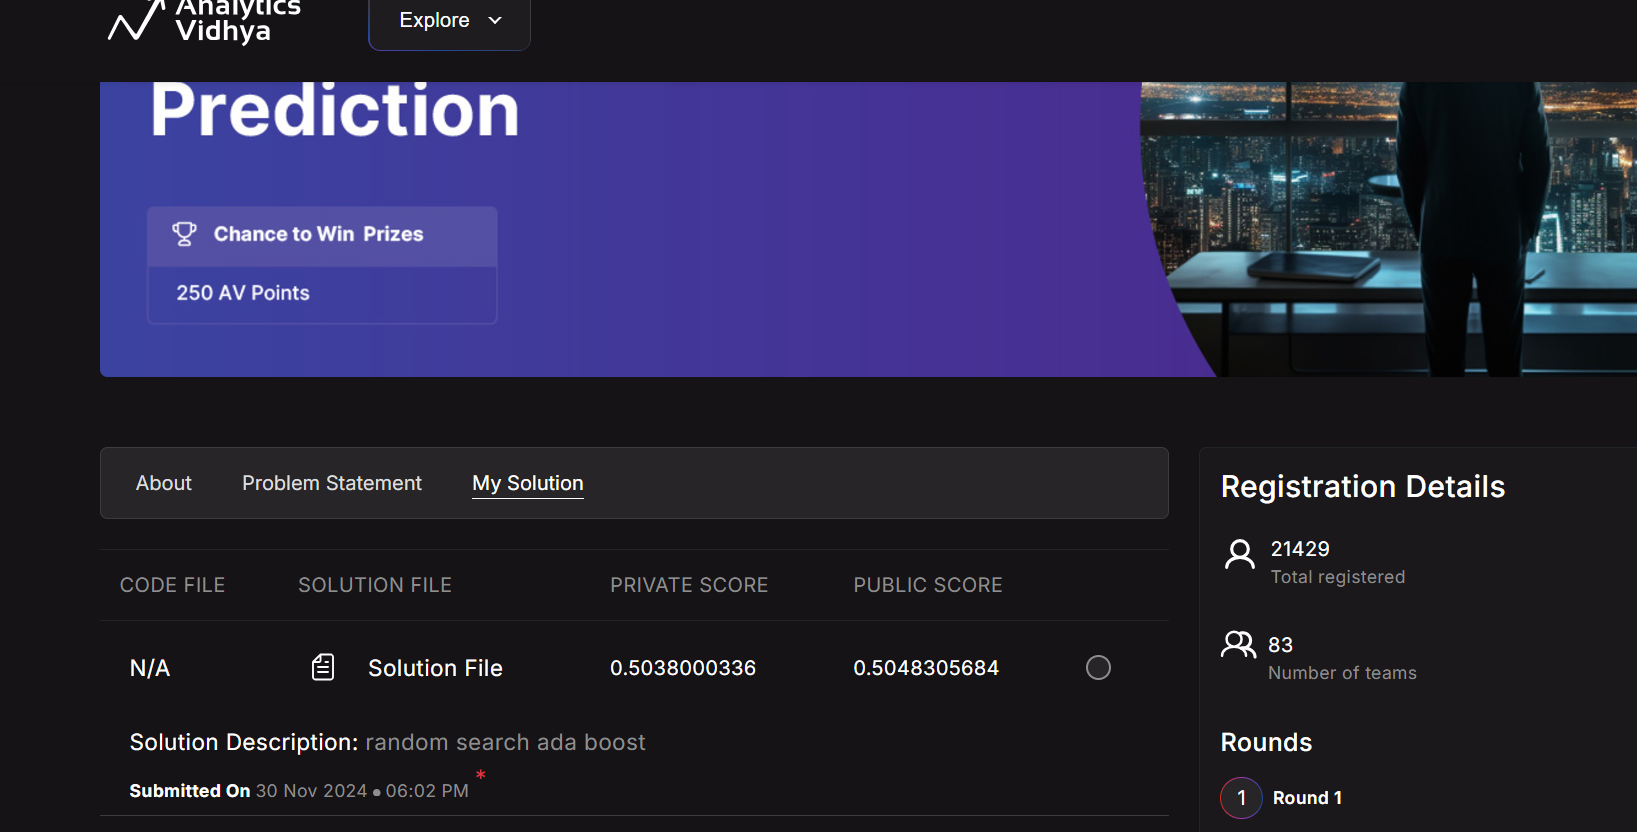

In [208]:

import xgboost as xgb
from xgboost import XGBClassifier

In [126]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__scale_pos_weight': [1, 2, 5]
}

In [230]:
   # clf = xgb.XGBClassifier(n_estimators=1000,
    #                            max_depth=6,
     #                           learning_rate=0.04,
      #                          subsample=0.9,
      #                          colsample_bytree=0.35,
      #                          objective = 'binary:logistic',
      #                          random_state = 1
      #                         )       

param_grid_xgb_2 = {
    'classifier__n_estimators': [1000],
    'classifier__learning_rate': [0.04],
    'classifier__max_depth': [6],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.35]
}


In [127]:
#model_pipeline_xgboost

In [286]:
from xgboost import XGBClassifier
model_pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric=['auc','logloss'],random_state=1,objective = 'binary:logistic',early_stopping_rounds=50))
])


In [287]:
model_pipeline_xgboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [128]:
#grid_6 = GridSearchCV(estimator=model_pipeline_xgboost, param_grid=param_grid_xgb, cv=2, scoring='roc_auc',verbose=3)

In [223]:
grid_xg = GridSearchCV(estimator=model_pipeline_xgboost, param_grid=param_grid_xgb_2, cv=2, scoring='roc_auc',verbose=3)

In [233]:
grid_xg = GridSearchCV(estimator=model_pipeline_xgboost, param_grid=param_grid_xgb_2, cv=2, scoring='roc_auc',verbose=3,early_stopping_rounds=50)

In [224]:
grid_xg.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END classifier__colsample_bytree=0.35, classifier__gamma=0, classifier__learning_rate=0.04, classifier__max_depth=3, classifier__n_estimators=1000, classifier__scale_pos_weight=1, classifier__subsample=0.9;, score=0.859 total time=   6.4s
[CV 2/2] END classifier__colsample_bytree=0.35, classifier__gamma=0, classifier__learning_rate=0.04, classifier__max_depth=3, classifier__n_estimators=1000, classifier__scale_pos_weight=1, classifier__subsample=0.9;, score=0.860 total time=   6.9s
[CV 1/2] END classifier__colsample_bytree=0.35, classifier__gamma=0, classifier__learning_rate=0.04, classifier__max_depth=3, classifier__n_estimators=1000, classifier__scale_pos_weight=2, classifier__subsample=0.9;, score=0.859 total time=   6.7s
[CV 2/2] END classifier__colsample_bytree=0.35, classifier__gamma=0, classifier__learning_rate=0.04, classifier__max_depth=3, classifier__n_estimators=1000, classifier__scale_pos_weight=2, classi

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(s...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...))]),
             param_grid={'classifier__colsample_bytree': [0.35],
                         'classifier__gamma': [0, 0.1, 0.2],
                         'classifier__learning_rate': [0.04],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [1000],
                         'classifier__scale_pos_weight': [1, 2, 5],
                         'classifier__subsample': [0.9]},
             scoring='roc_auc', verbose=3)

In [289]:
grid_xg.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END classifier__colsample_bytree=0.35, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__n_estimators=1000, classifier__subsample=0.9;, score=0.867 total time=   9.4s
[CV 2/2] END classifier__colsample_bytree=0.35, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__n_estimators=1000, classifier__subsample=0.9;, score=0.868 total time=   9.2s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(s...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...))]),
             param_grid={'classifier__colsample_bytree': [0.35],
                         'classifier__learning_rate': [0.04],
                         'classifier__max_depth': [6],
                         'classifier__n_estimators': [1000],
                         'classifier__subsample': [0.9]},
             scoring='roc_auc', verbose=3)

In [235]:
grid_xg.best_params_

{'classifier__colsample_bytree': 0.35,
 'classifier__learning_rate': 0.04,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 1000,
 'classifier__subsample': 0.9}

In [226]:
xgbmodel_2 = grid_xg.best_estimator_

In [236]:
xgbmodel_3 = grid_xg.best_estimator_

Train AUC ROC
0.8113603983630959
Valid AUC ROC
0.8024700468905465
Train cnf_matrix
[[206735  94336]
 [  2681  39246]]
Valid cnf_matrix
[[22872 10456]
 [  389  4394]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    301071
           1       0.29      0.94      0.45     41927

    accuracy                           0.72    342998
   macro avg       0.64      0.81      0.63    342998
weighted avg       0.90      0.72      0.77    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     33328
           1       0.30      0.92      0.45      4783

    accuracy                           0.72     38111
   macro avg       0.64      0.80      0.63     38111
weighted avg       0.90      0.72      0.76     38111



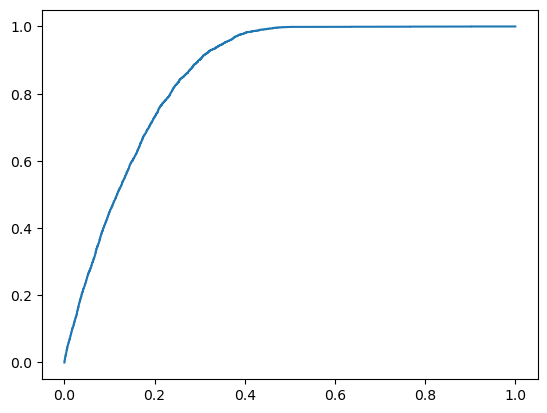

In [237]:
model_train_val_eval(train_X,val_X,train_y,val_y,xgbmodel_3)

Train AUC ROC
0.8173385373697855
Valid AUC ROC
0.800406788690623
Train cnf_matrix
[[208719  92352]
 [  2456  39471]]
Valid cnf_matrix
[[23055 10273]
 [  435  4348]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.99      0.69      0.81    301071
           1       0.30      0.94      0.45     41927

    accuracy                           0.72    342998
   macro avg       0.64      0.82      0.63    342998
weighted avg       0.90      0.72      0.77    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     33328
           1       0.30      0.91      0.45      4783

    accuracy                           0.72     38111
   macro avg       0.64      0.80      0.63     38111
weighted avg       0.90      0.72      0.77     38111



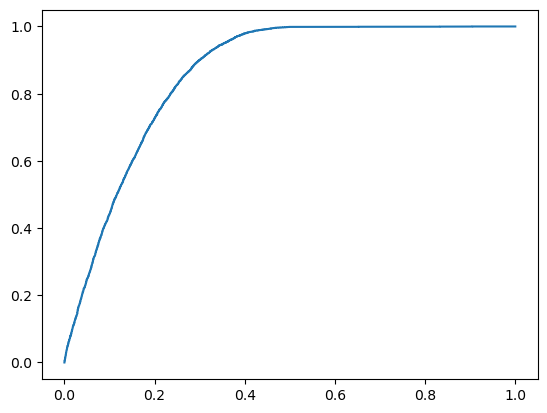

In [228]:
model_train_val_eval(train_X,val_X,train_y,val_y,xgbmodel_2)

In [229]:
# updating the existing target values with predicted values
sub['Response'] = xgbmodel_2.predict(test)
sub.to_csv('xgbmodel_2.csv',index=False)

In [238]:
sub['Response'] = xgbmodel_3.predict(test)
sub.to_csv('xgbmodel_3.csv',index=False)

In [284]:
joblib.dump(xgbmodel_3,'insurance_pipeline_model.pkl')

['insurance_pipeline_model.pkl']

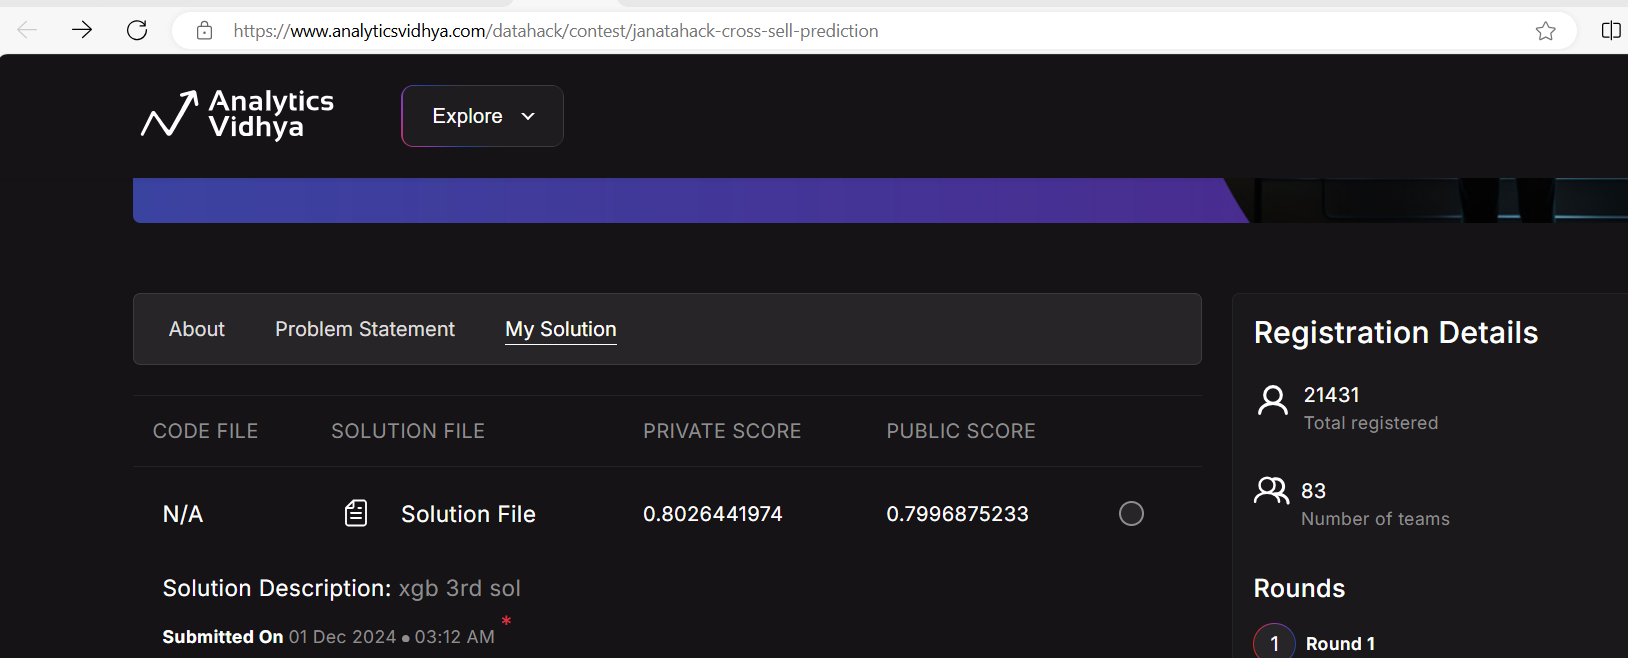

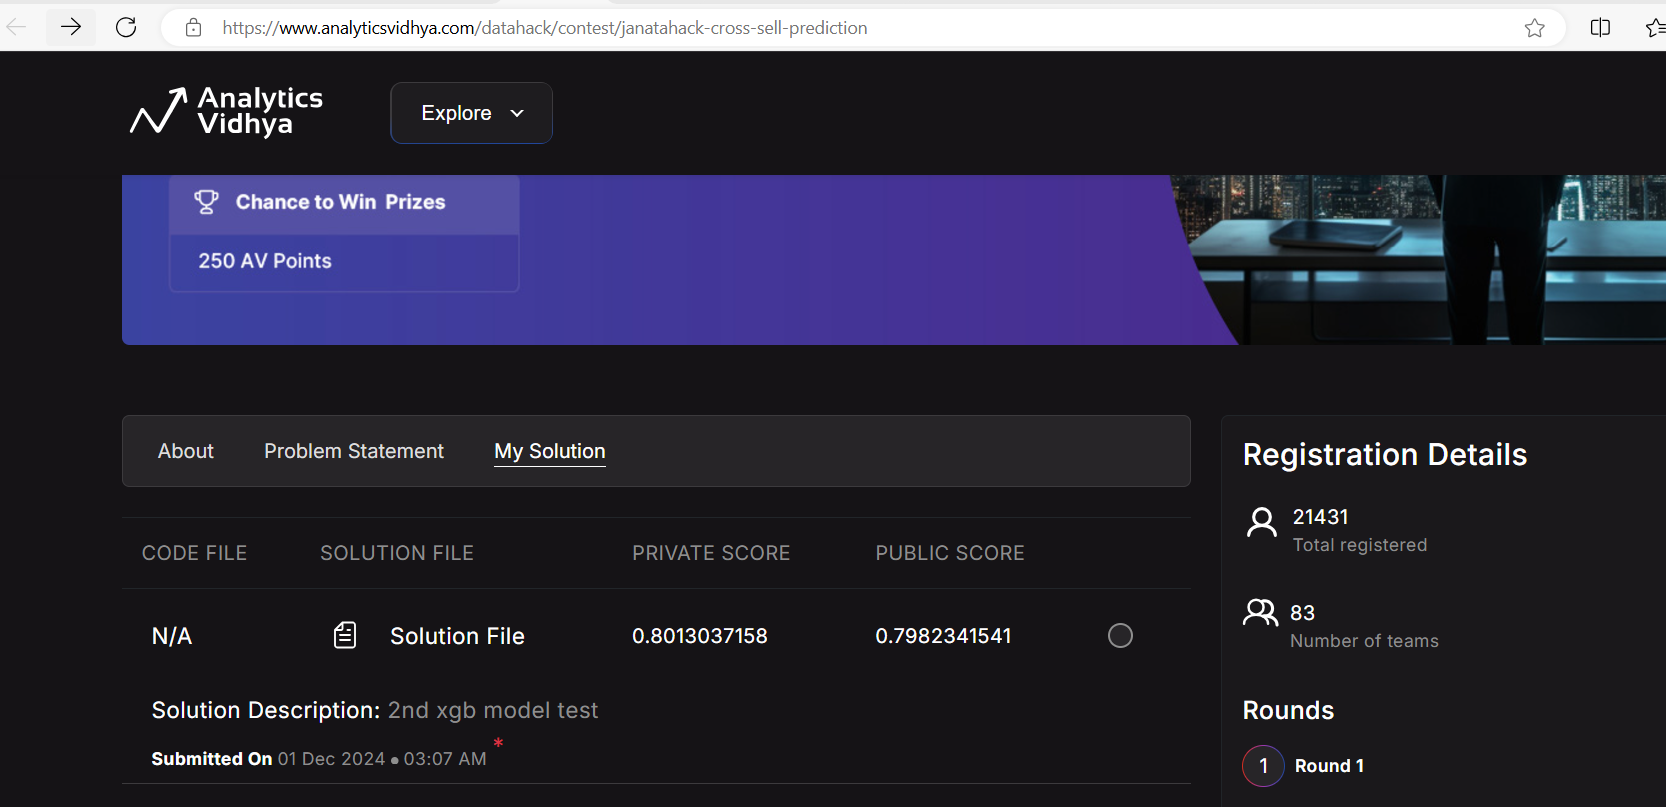

In [129]:
#grid_6.fit(train_X_os, train_y_os)

In [130]:
#grid_6.best_params_

In [131]:
#xgbmodel = grid_6.best_estimator_

In [132]:
#model_train_val_eval(train_X,val_X,train_y,val_y,xgbmodel)

In [133]:

#res_df_6 = pd.DataFrame(grid_6.cv_results_,)
#pd.set_option('display.max_colwidth',500)
#res_df_6[['params','mean_test_score','rank_test_score']]

In [134]:
# updating the existing target values with predicted values
#sub['Response'] = xgbmodel.predict(test)
#sub.to_csv('xgbmodel.csv',index=False)

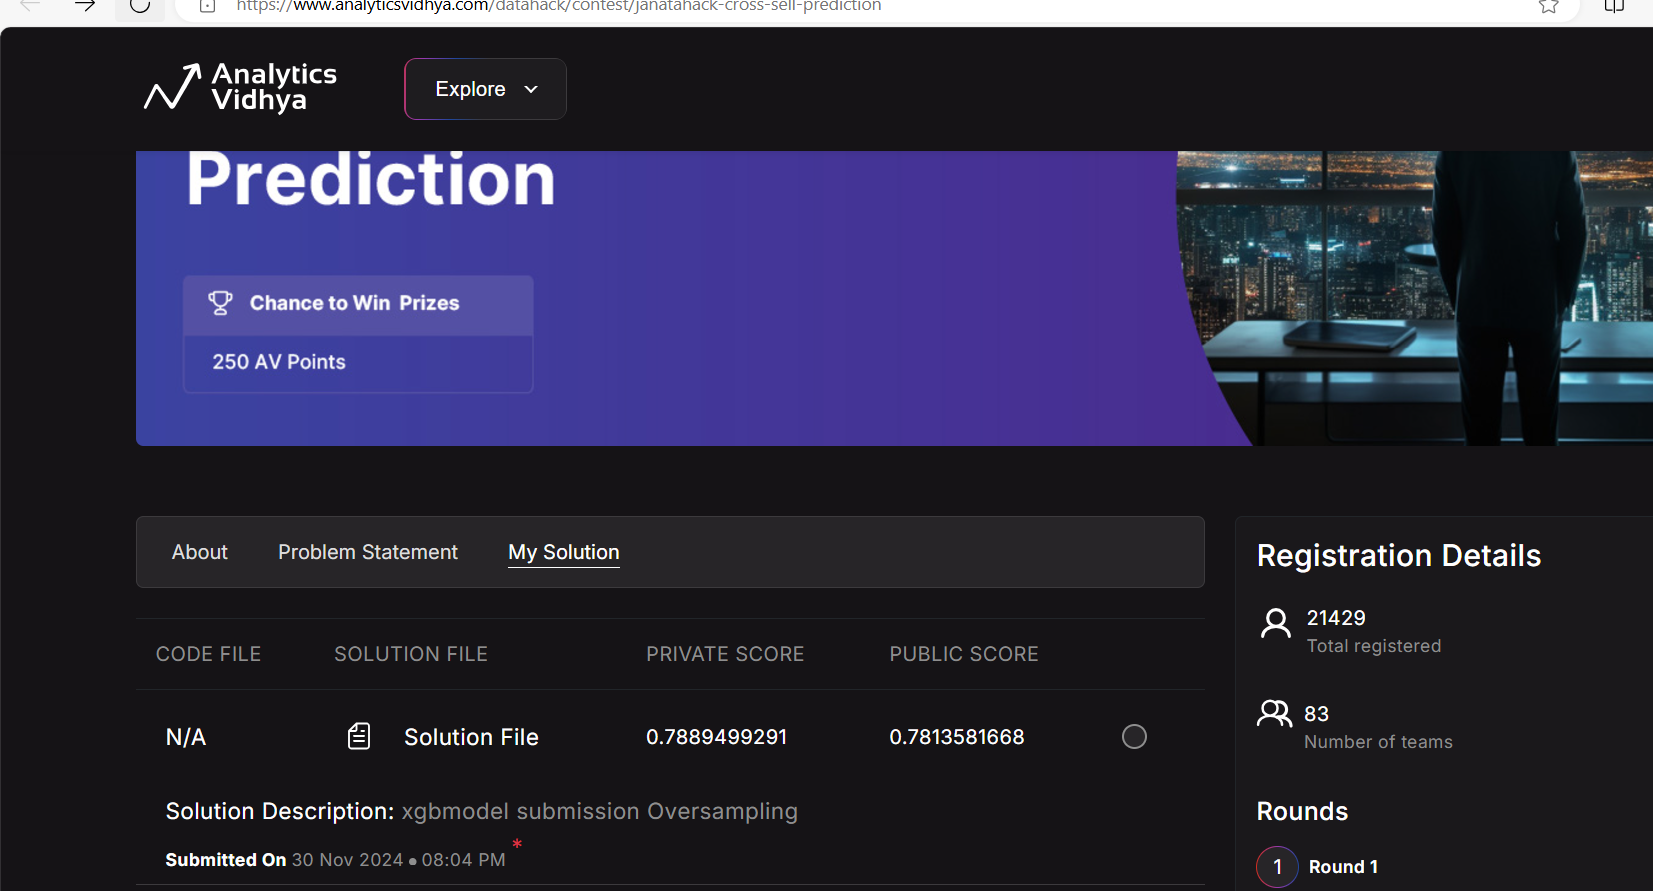

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

In [136]:
#grid_6 = GridSearchCV(estimator=model_pipeline_xgboost, param_grid=param_grid_xgb, cv=kfold, scoring='roc_auc',verbose=3)

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()


In [138]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
kfold = KFold(n_splits=2, shuffle=True, random_state=31)

In [139]:
param_grid = {
    'model__n_neighbors': range(1,20),
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [140]:
param_grid = {
    'model__n_neighbors': range(1,20),
    'model__leaf_size': range(1,30)
}

In [141]:
model_pipeline_knn = Pipeline(
    steps=[
        ('preprocess', preprocess),  # Preprocessing
        ('model', KNeighborsClassifier())  # KNN classifier
    ]
)

# Adjust the param grid accordingly
param_grid_knn = {
    'model__n_neighbors': range(1, 20),
    'model__leaf_size': range(1, 30),
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

In [142]:
#grid_search_knn = GridSearchCV(estimator=model_pipeline_knn, cv = kfold, param_grid = param_grid_knn,  scoring='roc_auc',verbose=3)

In [143]:
#grid_search_knn.fit(train_X_us, train_y_us)

In [144]:
kfold = KFold(n_splits=5, shuffle=True, random_state=22)

In [145]:

preprocessor = ColumnTransformer(
    transformers = [
        ('cat_encode', cat_pipe_encode, cat_cols),  # categorical columns
        ('num_encode', num_pipe_encode, num_cols)   # numerical columns
    ]
)

In [146]:
model_preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_model', LogisticRegression())
])

In [147]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [148]:
# Polynomial Features

model_preprocess_polynomial_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('lasso_model', LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.05 ))
])

In [149]:
param_grid = {
    'lasso_model__C' : [0.001, 0.01, 0.02, 0.05, 0.1, 10, 100]
}

In [150]:
grid_poly = GridSearchCV(estimator=model_preprocess_polynomial_lasso_pipeline, param_grid=param_grid, 
                    cv=2, scoring='roc_auc',verbose=3)

In [151]:
#grid_poly.fit(train_X_os, train_y_os)

In [152]:
#model_preprocess_pipeline.fit(X_train, y_train)

In [153]:
#grid_search = GridSearchCV(model_preprocess_polynomial_lasso_pipeline, param_grid, cv= kfold, scoring='roc_auc')

In [154]:
#grid_search.fit(X_train, y_train)

In [155]:
#poly_model = grid_poly.best_estimator_

In [156]:
#model_train_val_eval(train_X,val_X,train_y,val_y,poly_model)

In [157]:
#sub['Response'] = poly_model.predict(test)
#sub.to_csv('polymodel_us.csv',index=False)

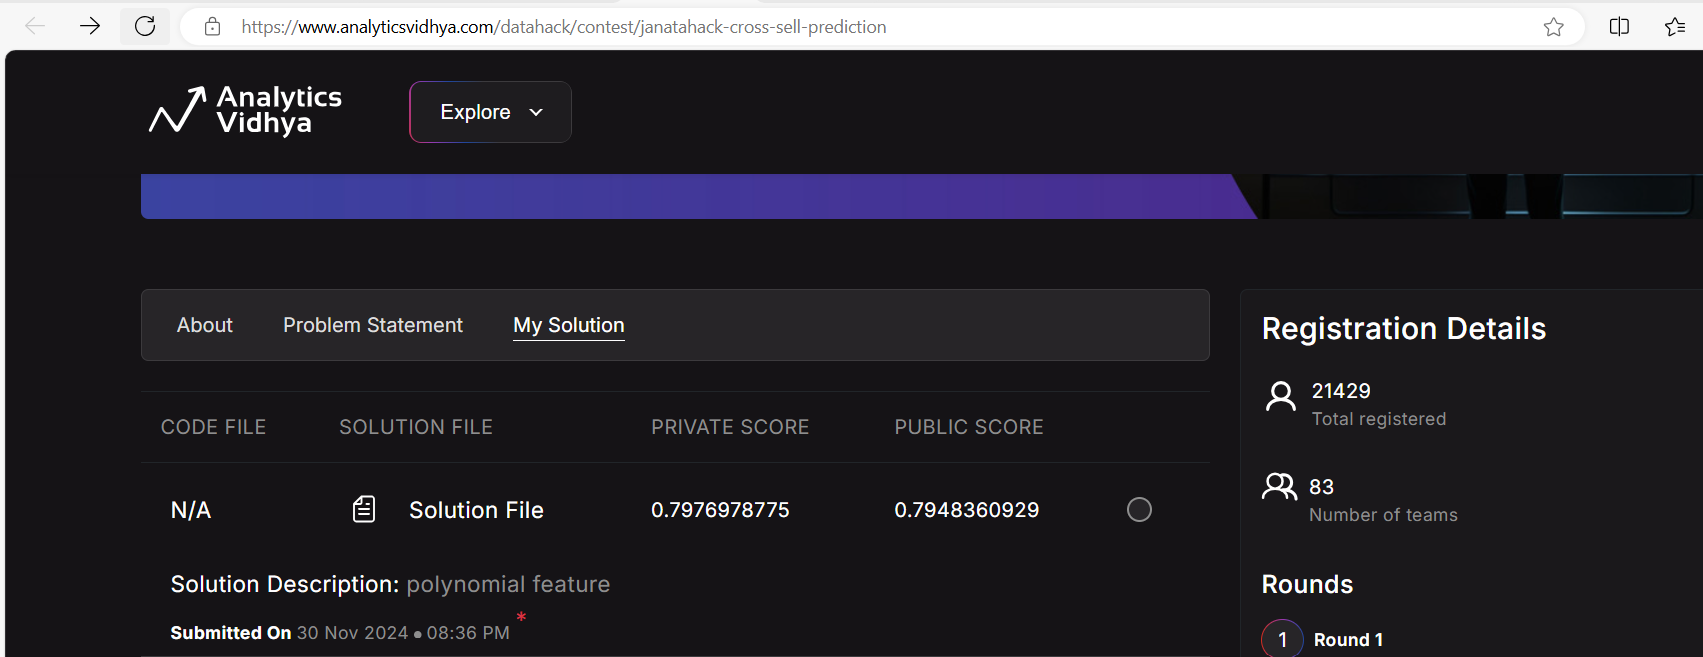

In [158]:
kfold = KFold(n_splits=5, shuffle=True, random_state=22)

In [159]:
param_grid = {
    'lasso_model__C' : [0.001, 0.01, 0.02, 0.05, 0.1, 10, 100]
}

In [160]:
#GridSearch with KFold for polynomial lasso
#grid_search = GridSearchCV(model_preprocess_polynomial_lasso_pipeline, param_grid, cv= kfold, scoring='roc_auc',verbose=3)

In [161]:
#grid_search.fit(train_X_os, train_y_os)

In [162]:
#lasso_model = grid_search.best_estimator_

In [163]:
#model_train_val_eval(train_X,val_X,train_y,val_y,lasso_model)

In [164]:
#sub['Response'] = lasso_model.predict(test)
#sub.to_csv('lasso_model_us.csv',index=False)

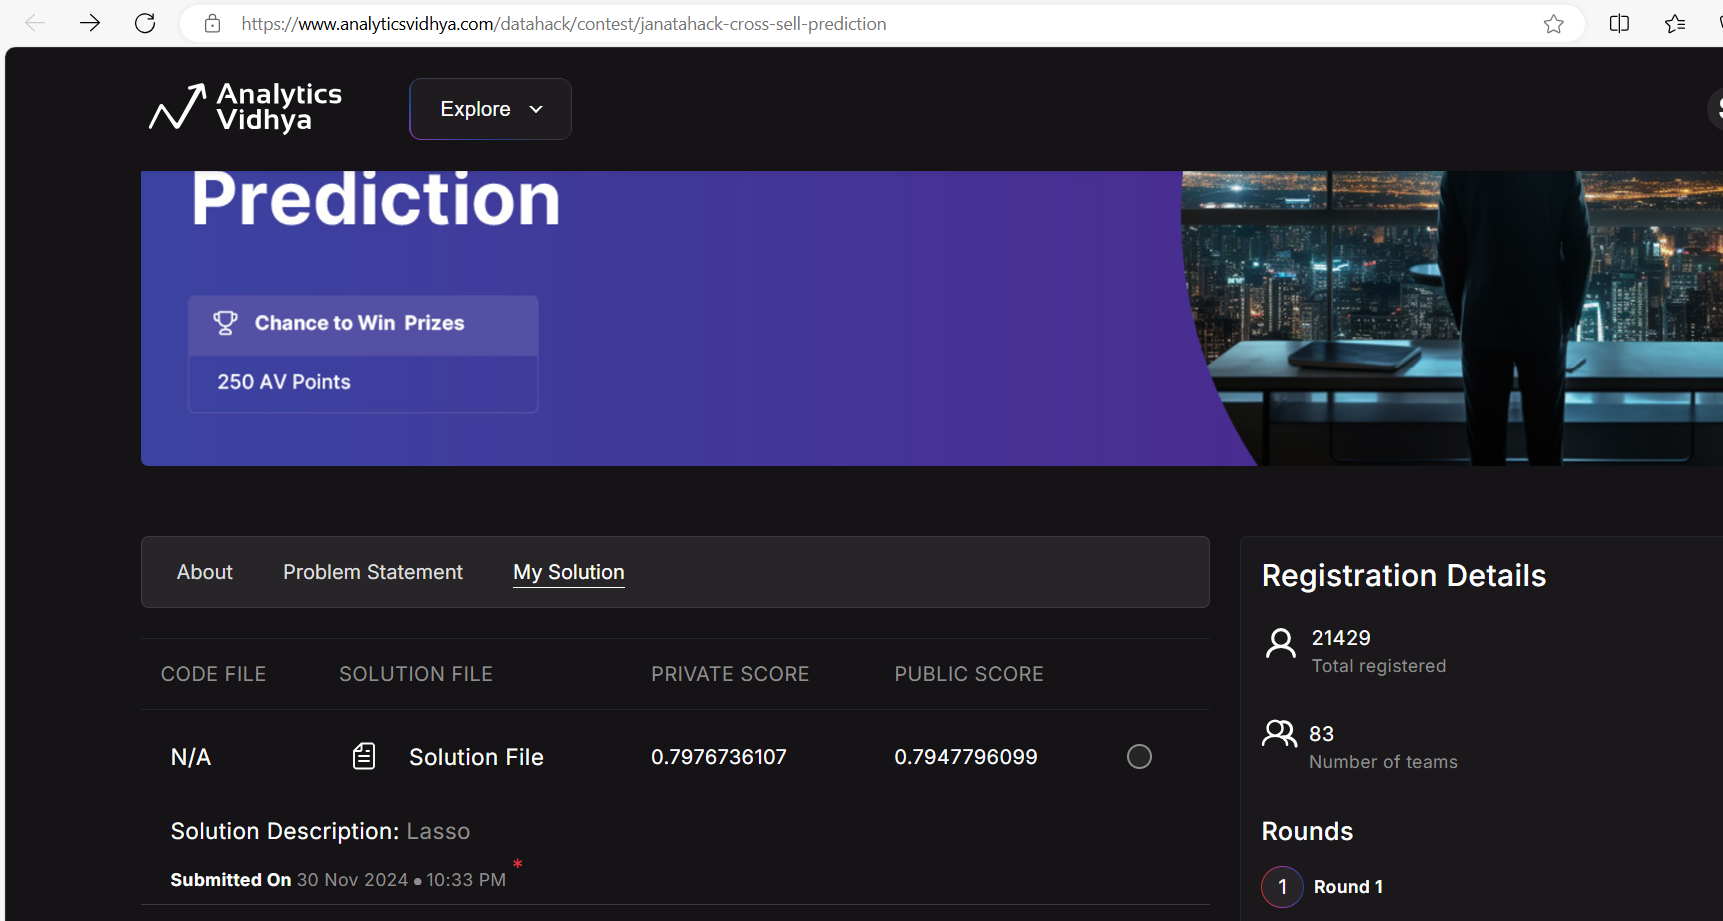

In [165]:
#Gradient Boosting

# Define the pipeline
model_preprocess_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Replace with your preprocessing pipeline
    ('gb_model', GradientBoostingClassifier(random_state=42))
])

In [166]:
param_grid = {
    'gb_model__n_estimators': [50, 100, 200],         # Number of boosting stages
    'gb_model__learning_rate': [0.01, 0.05, 0.1],    # Contribution of each tree
    'gb_model__max_depth': [3, 5, 7],                # Maximum depth of individual trees
    'gb_model__min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'gb_model__min_samples_leaf': [1, 3, 5],         # Minimum samples in a leaf node
    'gb_model__subsample': [0.6, 0.8, 1.0],          # Fraction of samples used for training
}


In [167]:
grid_search = GridSearchCV(
    estimator=model_preprocess_gb_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',            # Use ROC AUC as the scoring metric
    cv=2,                         # 5-fold cross-validation
    verbose=3,                    # Detailed output during fitting
    n_jobs=-1                     # Use all CPU cores for parallel processing
)


In [168]:
# Fit the model
#grid_search.fit(train_X_us, train_y_us)

In [169]:
#grad_boost_model = grid_search.best_estimator_

In [170]:
#model_train_val_eval(train_X,val_X,train_y,val_y,grad_boost_model)

In [171]:
#sub['Response'] = grad_boost_model.predict(test)
#sub.to_csv('grad_boot_us.csv',index=False)

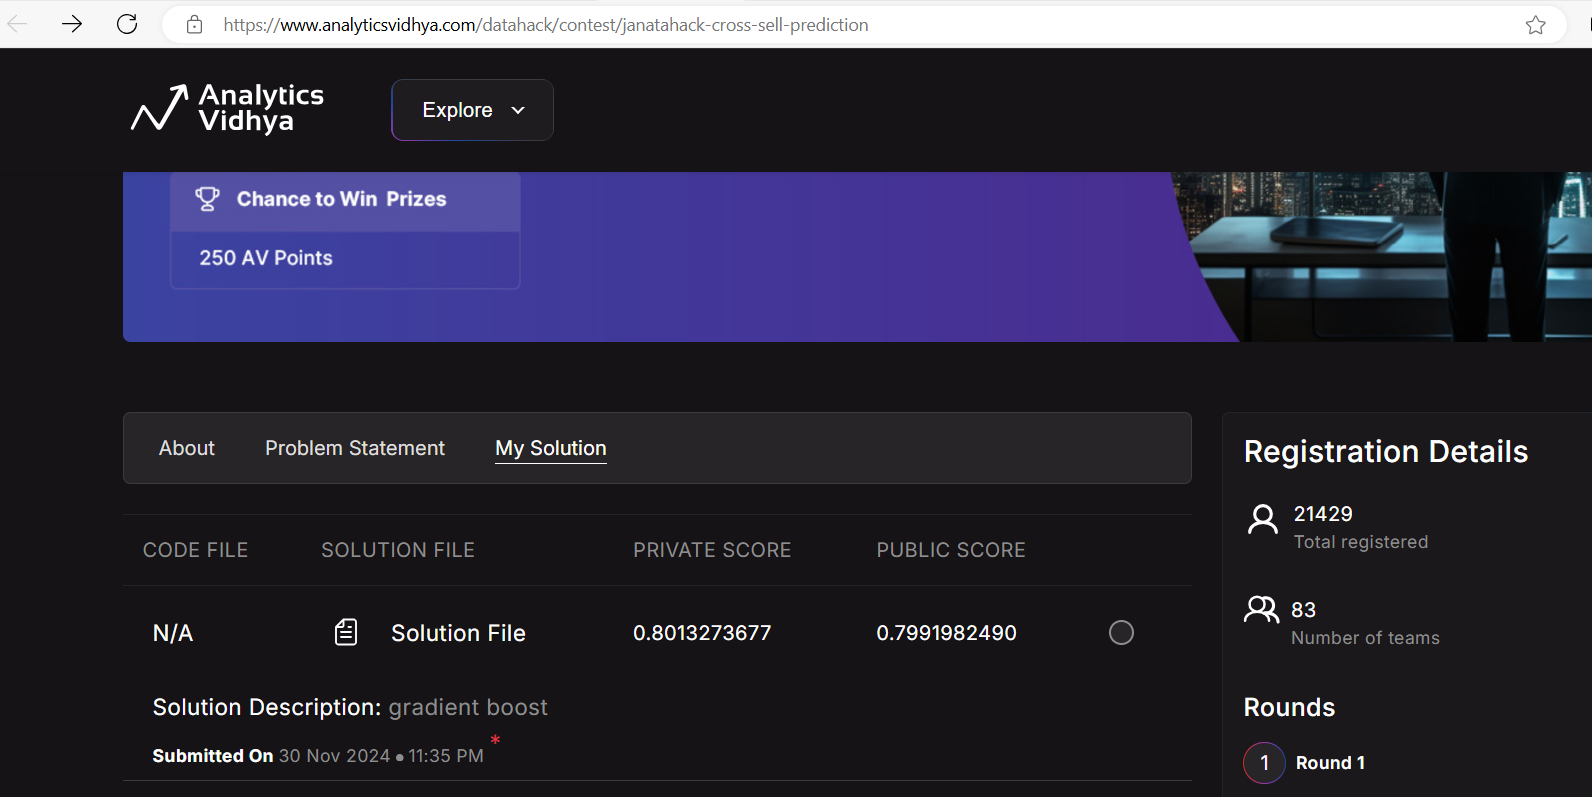

In [172]:
from sklearn import svm
from sklearn.svm import SVC

In [173]:
# Define a pipeline with preprocessing (StandardScaler) and the SVM classifier
svm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalize features
    ('svm', SVC(probability=True, random_state=42))  # SVC with probability estimates
])


In [174]:
# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],           # Regularization parameter
    'svm__gamma': [0.01, 0.1, 1, 'scale'], # Kernel coefficient for RBF
    'svm__kernel': ['rbf'],                # Using RBF kernel
}

In [175]:
grid_search_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    scoring='roc_auc',       # Optimize for ROC AUC
    cv=2,                    # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                # Use all available cores
)


In [176]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [177]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')
clf4 = AdaBoostClassifier()

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3), ('dt', clf4)], voting='soft')

In [178]:
logistic = LogisticRegression(penalty='l1', solver='liblinear', C=0.05, random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [179]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic),
        ('gb', gradient_boosting),
        ('knn', knn),
        ('dt', decision_tree),
        ('rf', random_forest)
    ],
    voting='soft'  # Soft voting considers probabilities, better for ROC
)

In [180]:
estimators = [
    ('rf1', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2', RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)),
    ('gbm', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200))
    
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [181]:
# Full pipeline
voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('voting_clf', voting_clf)
])


In [185]:
# Parameter grid for GridSearchCV
param_grid_vote = {
    'voting_clf__knn__n_neighbors': [3],
    'voting_clf__rf__n_estimators': [50],
    'voting_clf__rf__max_depth': [5],
    'voting_clf__gb__n_estimators': [50],
    'voting_clf__gb__learning_rate': [0.1],
}


In [186]:
# GridSearchCV for hyperparameter tuning
random_search_vote = RandomizedSearchCV(
    estimator=voting_pipeline,
    param_distributions=param_grid_vote,
    scoring='roc_auc',
    cv=2,
    n_jobs=1,
    verbose=3
)


In [187]:
random_search_vote.fit(train_X, train_y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END voting_clf__gb__learning_rate=0.1, voting_clf__gb__n_estimators=50, voting_clf__knn__n_neighbors=3, voting_clf__rf__max_depth=5, voting_clf__rf__n_estimators=50;, score=0.833 total time= 4.3min
[CV 2/2] END voting_clf__gb__learning_rate=0.1, voting_clf__gb__n_estimators=50, voting_clf__knn__n_neighbors=3, voting_clf__rf__max_depth=5, voting_clf__rf__n_estimators=50;, score=0.833 total time= 7.0min


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat_encode',
                                                                               Pipeline(steps=[('impute_cat',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                              ('num_encode',
                                                                               Pipeline(steps=[('impute_num',
                                                                                                SimpleImp...
                                                                            KNeighborsClassifier()),
                                                                           ('dt',
                                                                            DecisionTreeClassifier(random_state=42)),
                                                                           ('rf',
                                                                            RandomForestClassifier(random_state=42))],
                                                               voting='soft'))]),
                   n_jobs=1,
                   param_distributions={'voting_clf__gb__learning_rate': [0.1],
                                        'voting_clf__gb__n_estimators': [50],
                                        'voting_clf__knn__n_neighbors': [3],
                                        'voting_clf__rf__max_depth': [5],
                                        'voting_clf__rf__n_estimators': [50]},
                   scoring='roc_auc', verbose=3)

In [188]:
voting_model = random_search_vote.best_estimator_

Train AUC ROC
0.6921911894483268
Valid AUC ROC
0.5361760285994495
Train cnf_matrix
[[301071      0]
 [ 25811  16116]]
Valid cnf_matrix
[[32548   780]
 [ 4325   458]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    301071
           1       1.00      0.38      0.56     41927

    accuracy                           0.92    342998
   macro avg       0.96      0.69      0.76    342998
weighted avg       0.93      0.92      0.91    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     33328
           1       0.37      0.10      0.15      4783

    accuracy                           0.87     38111
   macro avg       0.63      0.54      0.54     38111
weighted avg       0.82      0.87      0.83     38111



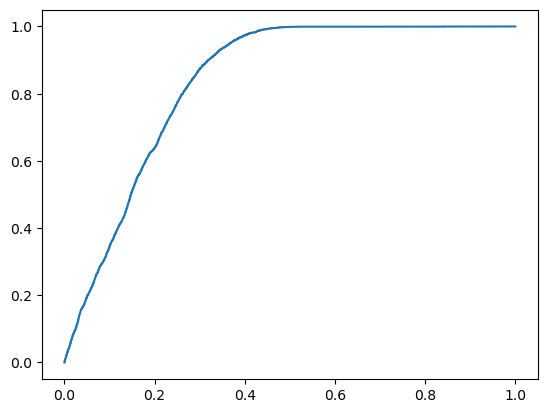

In [189]:
model_train_val_eval(train_X,val_X,train_y,val_y,voting_model)

In [190]:
sub['Response'] = voting_model.predict(test)
sub.to_csv('voting.csv',index=False)

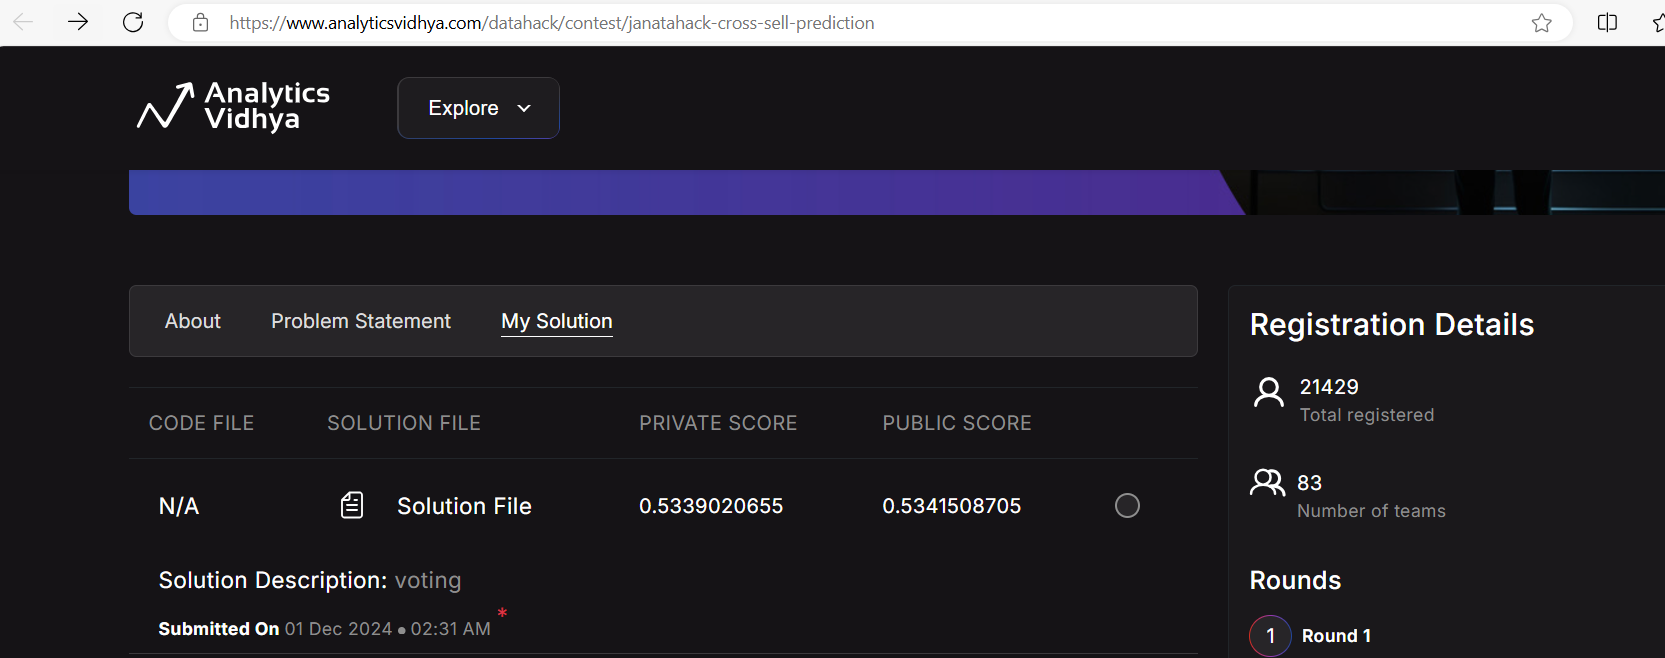

In [242]:
params_8 = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C': [0.5, 3]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3, 5]
    },
    {
        'model': [XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)],
        'model__n_estimators': [100, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.5, 0.7],
        'model__scale_pos_weight': [1, 3]
    },
    {
        'model': [StackingClassifier(
            estimators=[
                ('rf', RandomForestClassifier(random_state=42)),
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42))
            ],
            final_estimator=LogisticRegression(),
            stack_method='predict_proba'
        )],
        'model__rf__n_estimators': [50, 100],
        'model__rf__max_depth': [3, 5],
        'model__gb__n_estimators': [50, 100],
        'model__gb__learning_rate': [0.01, 0.05],
        'model__xgb__n_estimators': [100, 300],
        'model__xgb__learning_rate': [0.01, 0.05],
        'model__xgb__max_depth': [3, 5]
    }
]

In [244]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())  # Placeholder, replaced during GridSearch
])

In [245]:
grid_stack = GridSearchCV(estimator=pipeline, param_grid=params_8, cv=2, scoring='roc_auc',verbose=3)

In [247]:
grid_stack.fit(train_X_us, train_y_us)

Fitting 2 folds for each of 278 candidates, totalling 556 fits
[CV 1/2] END model=LogisticRegression(), model__C=0.5, model__penalty=l2;, score=0.835 total time=   0.1s
[CV 2/2] END model=LogisticRegression(), model__C=0.5, model__penalty=l2;, score=0.838 total time=   0.1s
[CV 1/2] END model=LogisticRegression(), model__C=0.5, model__penalty=None;, score=0.835 total time=   0.1s
[CV 2/2] END model=LogisticRegression(), model__C=0.5, model__penalty=None;, score=0.838 total time=   0.1s
[CV 1/2] END model=LogisticRegression(), model__C=3, model__penalty=l2;, score=0.835 total time=   0.1s
[CV 2/2] END model=LogisticRegression(), model__C=3, model__penalty=l2;, score=0.838 total time=   0.1s
[CV 1/2] END model=LogisticRegression(), model__C=3, model__penalty=None;, score=0.835 total time=   0.0s
[CV 2/2] END model=LogisticRegression(), model__C=3, model__penalty=None;, score=0.838 total time=   0.1s
[CV 1/2] END model=DecisionTreeClassifier(), model__max_depth=3;, score=0.816 total time=

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(s...
                                                                                  random_state=42, ...))],
                                                       final_estimator=LogisticRegression(),
                                                       stack_method='predict_proba')],
                          'model__gb__learning_rate': [0.01, 0.05],
                          'model__gb__n_estimators': [50, 100],
                          'model__rf__max_depth': [3, 5],
                          'model__rf__n_estimators': [50, 100],
                          'model__xgb__learning_rate': [0.01, 0.05],
                          'model__xgb__max_depth': [3, 5],
                          'model__xgb__n_estimators': [100, 300]}],
             scoring='roc_auc', verbose=3)

In [248]:
stack_model2 = grid_stack.best_estimator_

Train AUC ROC
0.7902029437768648
Valid AUC ROC
0.7894278514208939
Train cnf_matrix
[[179533 121538]
 [   667  41260]]
Valid cnf_matrix
[[19968 13360]
 [   97  4686]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    301071
           1       0.25      0.98      0.40     41927

    accuracy                           0.64    342998
   macro avg       0.62      0.79      0.57    342998
weighted avg       0.91      0.64      0.70    342998

Valid cls rep
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     33328
           1       0.26      0.98      0.41      4783

    accuracy                           0.65     38111
   macro avg       0.63      0.79      0.58     38111
weighted avg       0.90      0.65      0.71     38111



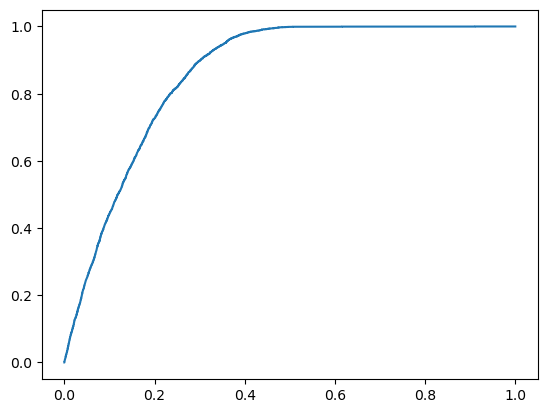

In [249]:
model_train_val_eval(train_X,val_X,train_y,val_y,stack_model2)

In [250]:
sub['Response'] = stack_model2.predict(test)
sub.to_csv('stack_model2_us.csv',index=False)

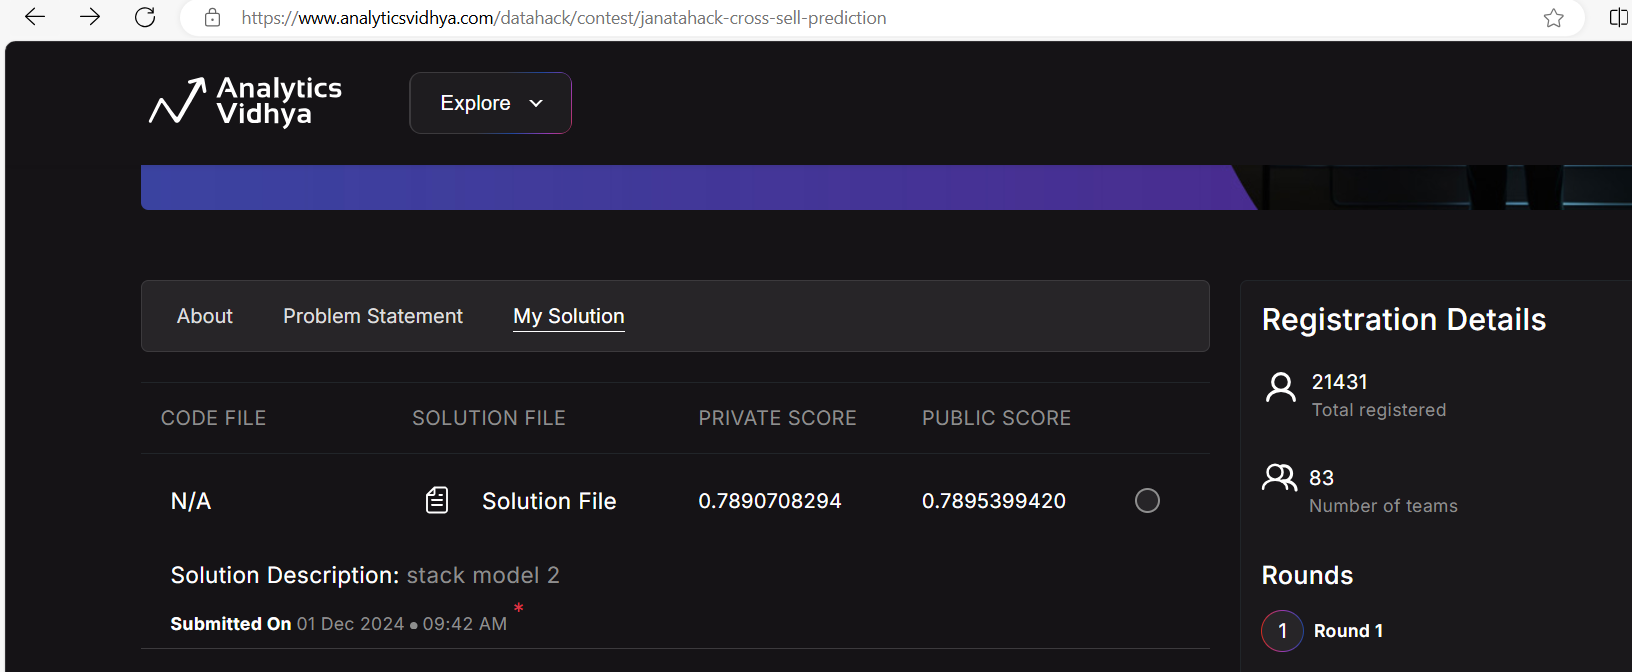

In [311]:
params_optimized = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l2'],
        'classifier__C': [0.5, 1.0, 3.0]
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False, objective='binary:logistic', random_state=42)],
        'classifier__n_estimators': [100, 300, 500],  # Number of trees
        'classifier__learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
        'classifier__max_depth': [3, 6, 9],  # Maximum depth of trees
        'classifier__min_child_weight': [1, 3, 5],  # Minimum sum of weights of all children
        'classifier__subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
        'classifier__colsample_bytree': [0.4, 0.6, 0.8],  # Fraction of features used per tree
        'classifier__gamma': [0, 0.1, 0.2],  # Minimum loss reduction for split
        'classifier__reg_alpha': [0, 0.01, 0.1],  # L1 regularization term
        'classifier__reg_lambda': [1, 5, 10],  # L2 regularization term
        'classifier__scale_pos_weight': [1, 3, 5]  # Class imbalance correction
    }
]

In [263]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [351]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42))
])

In [265]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [266]:
from sklearn.metrics import roc_auc_score, make_scorer

In [349]:
roc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

In [350]:
randomized_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=params_optimized,
    n_iter=50,  # Reduced number of iterations
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',  # Directly use ROC-AUC scoring
    n_jobs=-1,
    verbose=3,
    random_state=42
)

In [352]:
randomized_search.fit(train_X_us, train_y_us)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat_encode',
                                                                               Pipeline(steps=[('impute_cat',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')...
                                         'classifier__learning_rate': [0.01,
                                                                       0.05,
                                                                       0.1],
                                         'classifier__max_depth': [3, 6, 9],
                                         'classifier__min_child_weight': [1, 3,
                                                                          5],
                                         'classifier__n_estimators': [100, 300,
                                                                      500],
                                         'classifier__reg_alpha': [0, 0.01,
                                                                   0.1],
                                         'classifier__reg_lambda': [1, 5, 10],
                                         'classifier__scale_pos_weight': [1, 3,
                                                                          5],
                                         'classifier__subsample': [0.6, 0.8,
                                                                   1.0]}],
                   random_state=42, scoring='roc_auc', verbose=3)

In [353]:
best_pipeline = randomized_search.best_estimator_

In [354]:
proba_predictions = best_pipeline.predict_proba(val_X)

print(proba_predictions)

[[0.9881054  0.01189458]
 [0.12370348 0.8762965 ]
 [0.08826542 0.9117346 ]
 ...
 [0.29767513 0.70232487]
 [0.36719638 0.6328036 ]
 [0.11702693 0.8829731 ]]


In [355]:
new_model_xgb = randomized_search.best_estimator_

Train AUC ROC
0.789463084062379
Valid AUC ROC
0.7898997699134265
Train cnf_matrix
[[178750 122321]
 [   620  41307]]
Valid cnf_matrix
[[19881 13447]
 [   80  4703]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      0.59      0.74    301071
           1       0.25      0.99      0.40     41927

    accuracy                           0.64    342998
   macro avg       0.62      0.79      0.57    342998
weighted avg       0.91      0.64      0.70    342998

Valid cls rep
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     33328
           1       0.26      0.98      0.41      4783

    accuracy                           0.65     38111
   macro avg       0.63      0.79      0.58     38111
weighted avg       0.90      0.65      0.70     38111



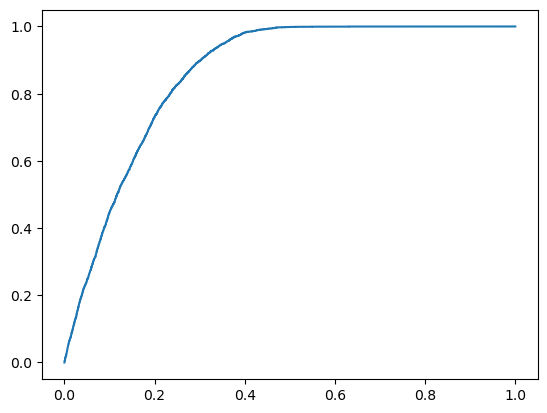

In [317]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_xgb)

In [356]:
print(f"Train AUC ROC: {train_roc}")
print(f"Valid AUC ROC: {val_roc}")

Train AUC ROC: 0.846424411566032
Valid AUC ROC: 0.8485087720662946


In [ ]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC ROC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC ROC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)    

In [341]:
sub['Response'] = best_pipeline.predict_proba(test)
sub.to_csv('xgb_new_pred_proba.csv',index=False)

In [342]:
sub['Response'] = best_pipeline.predict_proba(test)
sub.to_csv('xgb_new2_pred_proba.csv',index=False)

In [335]:
params_optimized_2 = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l2'],
        'classifier__C': [0.5, 1.0, 3.0]
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [3, 5, 7,10],
        'classifier__class_weight': ['balanced']  # Added balanced class weights for Decision Tree
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False, objective='binary:logistic', random_state=42)],
        'classifier__n_estimators': [100, 300, 500,1000],  # Number of trees
        'classifier__learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
        'classifier__max_depth': [3, 6, 9],  # Maximum depth of trees
        'classifier__min_child_weight': [1, 3, 5],  # Minimum sum of weights of all children
        'classifier__subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
        'classifier__colsample_bytree': [0.4, 0.6, 0.8],  # Fraction of features used per tree
        'classifier__gamma': [0, 0.1, 0.2],  # Minimum loss reduction for split
        'classifier__reg_alpha': [0, 0.01, 0.1],  # L1 regularization term
        'classifier__reg_lambda': [1, 5, 10],  # L2 regularization term
        'classifier__scale_pos_weight': [1, 3, 5],  # Class imbalance correction
        'classifier__early_stopping_rounds': [10]  # Added early stopping to avoid overfitting
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 300, 500,1000],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5],
        'classifier__class_weight': ['balanced']  # Balanced class weights for RandomForest
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [100, 300, 500,1000],
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5],
        'classifier__subsample': [0.8, 1.0],
        # No class_weight parameter here, but consider using sample_weight during training
    }
]

In [336]:
randomized_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=params_optimized_2,
    n_iter=50,  # Reduced number of iterations
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    scoring='roc_auc',  # Directly use ROC-AUC scoring
    n_jobs=-1,
    verbose=3,
    random_state=42
)

In [338]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=train_y_us)


In [331]:
best_pipeline = randomized_search.best_estimator_
train_roc = roc_auc_score(train_y, best_pipeline.predict_proba(train_X)[:, 1])
val_roc = roc_auc_score(val_y, best_pipeline.predict_proba(val_X)[:, 1])

In [332]:
print(f"Train AUC ROC: {train_roc}")
print(f"Valid AUC ROC: {val_roc}")

Train AUC ROC: 0.846424411566032
Valid AUC ROC: 0.8485087720662946


In [333]:
new_model_xgb = randomized_search.best_estimator_

Train AUC ROC
0.792422656604826
Valid AUC ROC
0.7937881235992532
Train cnf_matrix
[[191131 109940]
 [  2096  39831]]
Valid cnf_matrix
[[21269 12059]
 [  242  4541]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.99      0.63      0.77    301071
           1       0.27      0.95      0.42     41927

    accuracy                           0.67    342998
   macro avg       0.63      0.79      0.59    342998
weighted avg       0.90      0.67      0.73    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     33328
           1       0.27      0.95      0.42      4783

    accuracy                           0.68     38111
   macro avg       0.63      0.79      0.60     38111
weighted avg       0.90      0.68      0.73     38111



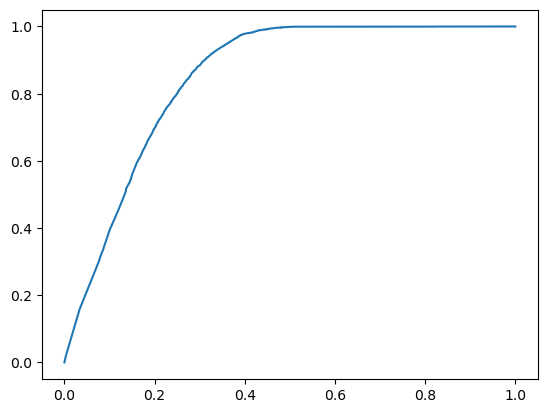

In [334]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_xgb)